In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
%matplotlib inline
print("Package Loaded")

Package Loaded


### data1.txt is from Chapter 2 of Ng's Machine learning class ###

In [2]:
xy = np.loadtxt("data1.txt", delimiter=',', unpack=True, dtype='float64')
train_X = xy[0:-1]
train_Y = xy[-1]

n_samples = train_X[0].size

print ""
print "Type of 'train_X' is %s" % type(train_X)
print "Shape of 'train_X' is", train_X.shape
print ("Type of 'train_Y' is ", type(train_Y))
print ("Shape of 'train_Y' is", train_Y.shape)
print ("n_samples' is", n_samples)


Type of 'train_X' is <type 'numpy.ndarray'>
Shape of 'train_X' is (2, 100)
("Type of 'train_Y' is ", <type 'numpy.ndarray'>)
("Shape of 'train_Y' is", (100,))
("n_samples' is", 100)


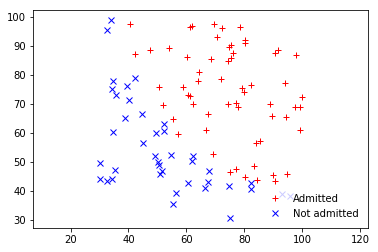

In [3]:
pos = train_Y == 1
neg = train_Y == 0

plt.figure(1)
plt.plot(train_X[0][pos], train_X[1][pos], 'r+', label='Admitted')
plt.plot(train_X[0][neg], train_X[1][neg], 'bx', label='Not admitted')
plt.axis('equal')
plt.legend(loc='lower right')

### Cost Function(minimize negative log-likelihood) ###
$$
J(\theta) = -\frac{1}{m}\sum_{i=1}^{m} [y^{(i)}\log(h_\theta(x^{(i)})) + (1-y^{(i)})\log(1-h_\theta(x^{(i)}))]
$$

### Vectorized Form ###
$$
J(\theta) = -\frac{1}{m}((\log(g(X\theta)))^TY + (\log(1-g(X\theta)))^T(1-Y))
$$

In [4]:
temp_X = np.insert(train_X, 0, 1, axis=0)
temp_Y = train_Y.reshape([n_samples, 1])
#W = np.random.random((1, 3))
#print temp_Y.reshape(n_samples, 1)

def h(X, w):
    return tf.matmul(w, X)

def hypothesis(X, w):
    return tf.sigmoid(h(X, w))

def costF(X, Y, w):
    #return tf.reduce_mean(-Y*tf.log(hypothesis(X, w)) - (1-Y)*tf.log(1-hypothesis(X, w)))
    return -(tf.matmul(tf.log(hypothesis(X, w)), Y) + tf.matmul(tf.log(1-hypothesis(X, w)), 1-Y)) / n_samples

X = tf.placeholder(tf.float32, name="input")
Y = tf.placeholder(tf.float32, name="output")
W = tf.Variable(tf.zeros([1, 3]), "weight")

learning_rate = 0.001
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(costF(X, Y, W))

init = tf.initialize_all_variables()

In [5]:
sess = tf.Session()

sess.run(init)
#feed = {X:temp_X, Y:temp_Y}
#temp = tf.reshape(Y, [n_samples, 1])
#print sess.run(temp, feed)
print sess.run(W), sess.run(costF(X, Y, W), feed_dict={X:temp_X, Y:temp_Y})
start = time.time()
for step in xrange(500001):
    feed = {X:temp_X, Y:temp_Y}
    sess.run(train, feed)
    if step % 10000 == 0:
        print step, sess.run(costF(X, Y, W), feed), sess.run(W)
print time.time() - start

[[ 0.  0.  0.]] [[ 0.69314718]]
0 [[ 0.69829071]] [[  9.99999829e-05   1.20092155e-02   1.12628415e-02]]
10000 [[ 0.58502346]] [[-0.66903025  0.01509195  0.00566287]]
20000 [[ 0.54729187]] [[-1.28307223  0.01942402  0.01046469]]
30000 [[ 0.51539886]] [[-1.84761941  0.02345053  0.01489054]]
40000 [[ 0.4882932]] [[-2.36808419  0.02720064  0.01897688]]
50000 [[ 0.46510208]] [[-2.84951591  0.03070208  0.02275992]]
60000 [[ 0.44511712]] [[-3.29643321  0.03398013  0.02627328]]
70000 [[ 0.42776635]] [[-3.71287036  0.0370579   0.0295478 ]]
80000 [[ 0.41259655]] [[-4.10221577  0.03995499  0.03260975]]
90000 [[ 0.39923346]] [[-4.46771193  0.04269103  0.03548457]]
100000 [[ 0.38739201]] [[-4.81172657  0.04528009  0.03819091]]
110000 [[ 0.37682819]] [[-5.13670206  0.0477375   0.04074807]]
120000 [[ 0.36735573]] [[-5.4443984   0.05007411  0.04316997]]
130000 [[ 0.3588126]] [[-5.73664427  0.0523018   0.04547104]]
140000 [[ 0.35107377]] [[-6.01475859  0.05442891  0.04766173]]
150000 [[ 0.34402484]] [

### Using reduce_mean ###
** spent time : 51.2828450203 sec/ 50000-iters**

** Cost : 0.465102 **

** W : [-1.28307223  0.01942402  0.01046469]**

### Using vectorized form ###
** spent time : 41.2695679665 sec/ 50000-iters **

** Cost : 0.46510208 **

** W : [-1.28307223  0.01942402  0.01046469]**

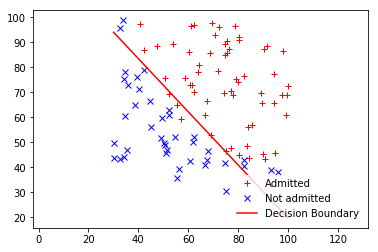

In [6]:
x = np.array([np.min(temp_X[1,:]), np.max(temp_X[1,:])])
y = (-1./sess.run(W[0,2])*(sess.run(W[0,0]) + sess.run(W[0,1])*x))

plt.figure(1)
plt.plot(train_X[0][pos], train_X[1][pos], 'r+', label='Admitted')
plt.plot(train_X[0][neg], train_X[1][neg], 'bx', label='Not admitted')
plt.plot(x, y, 'r-', label='Decision Boundary')
plt.axis('equal')
plt.legend(loc='lower right')